In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

Note remote dataset link : <a href = "https://files.slack.com/files-pri/T086NG3N69Y-F08EYGJSY1G/download/new_google_dataset.csv?origin_team=T086NG3N69Y">Click To Download </a>

In [216]:
# functions used
def wrangle(dataset_url):
    """Function takes dataset url and returns wrangled dataset"""
    google = pd.read_csv(dataset_url)

    # convert all feature heading to lower case
    # replace spaces with underscore in feature heading
    google.columns = [column.lower().replace(" ", "_") for column in google.columns]

    # clean miminum android
    # allow only figures
    google['minimum_android'] = [min_and.split("and")[0] for min_and in google['minimum_android']] # float(google['minimum_android'].str.split()[0][0])
    google['size_megabyte'] = [size.split("M")[0][0] for size in google['size']] # float(google['size'].str.split("M")[0][0])

    # drop features 
    to_drop = ['developer', 'developerid', 'installs', 'appstore_url', 'privacy_policy', 'developer_email', 'developer_website', 'size', 'developer_url', 'developer_id']
    google.drop(labels = to_drop, axis = 1, inplace = True)

    # convert minimum_install to integer
    google['minimum_installs'] = google['minimum_installs'].astype(int)

    # remove duplicate columns names
    new_names = ['app_name_x', 'app_id', 'category', 'rating', 'rating_count','minimum_installs', 'maximum_installs', 'free_x', 'price_x',
       'currency_x', 'minimum_android', 'released_x', 'last_updated','content_rating', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time', 'date', 'app_name_y', 'primary_genre', 'min_content_rating_value','size_bytes', 'required_ios_version', 'released_y', 'updated',
       'version', 'price_y', 'currency_y', 'free_y', 'average_user_rating','reviews', 'current_version_score', 'current_version_reviews',
       'size_megabyte']
    google.columns = new_names
    
    return google

In [217]:
# load dataset
file = "dataset/New_Google_dataset.csv"
google = wrangle(file)
df = pd.read_csv(file)

In [218]:
# checking the number of rows and columns of dataframe
shape = google.shape
print(f"Dataframe number of rows : {shape[0]}")
print(f"Dataframe numober of columns : {shape[1]}")

Dataframe number of rows : 216780
Dataframe numober of columns : 35


In [219]:
# inspect first five entries
google.head()

,app_name_x,app_id,category,rating,rating_count,minimum_installs,maximum_installs,free_x,price_x,currency_x,...,updated,version,price_y,currency_y,free_y,average_user_rating,reviews,current_version_score,current_version_reviews,size_megabyte
0,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,478,True,0.0,USD,...,2018-10-09T19:01:55Z,1.9,0.0,USD,True,0.0,0,0.0,0,6
1,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,702,True,0.0,USD,...,2019-06-22T12:16:07Z,1.0,0.0,USD,True,3.0,2,3.0,2,1
2,Readymade Grocery App,com.ionicfirebaseapp.readymadegroceryuserapp,Food & Drink,4.2,16.0,1000,4313,True,0.0,USD,...,2021-03-23T13:44:33Z,3.1.3,0.0,USD,True,0.0,0,0.0,0,1
3,Barnets Hair,com.phorest.barnetshair,Lifestyle,0.0,0.0,100,345,True,0.0,USD,...,2021-08-25T01:04:25Z,3.4.0,0.0,USD,True,0.0,0,0.0,0,3
4,GaiaZOO,nl.haveaniceday.gaiazoo,Travel & Local,3.4,67.0,10000,30921,True,0.0,USD,...,2021-07-07T11:28:12Z,1.3.8,0.0,USD,True,0.0,0,0.0,0,7


In [220]:
# inspect last five entries
google.tail()

,app_name_x,app_id,category,rating,rating_count,minimum_installs,maximum_installs,free_x,price_x,currency_x,...,updated,version,price_y,currency_y,free_y,average_user_rating,reviews,current_version_score,current_version_reviews,size_megabyte
216775,The Cleaners Rack,com.cleanersrack.storeapp,Shopping,0.0,0.0,1,4,True,0.0,USD,...,2020-05-28T00:46:12Z,2.2.0,0.0,USD,True,5.0,1,5.0,1,5
216776,GOKarli Carrera Rennbahn und Dart Onlineshop,de.gokarli.shop,Shopping,0.0,0.0,1000,2418,True,0.0,USD,...,2021-10-01T08:18:40Z,1.26.1,0.0,USD,True,0.0,0,0.0,0,9
216777,Asset Data Collection,com.linq.assetdatacollection,Business,0.0,0.0,500,687,True,0.0,USD,...,2021-09-21T15:15:19Z,1.23.2,0.0,USD,True,5.0,3,5.0,3,3
216778,Nutrishop Boise Meridian,com.tapmango.nutrishopbm,Health & Fitness,0.0,0.0,100,195,True,0.0,USD,...,2018-03-28T19:14:14Z,2.0.23,0.0,USD,True,1.0,1,1.0,1,2
216779,Engineers Careers,com.eventapps.eventapps,Business,0.0,0.0,100,353,True,0.0,USD,...,2021-07-31T21:01:27Z,1.3,0.0,USD,True,0.0,0,0.0,0,2


In [221]:
# checking info about the dataframe
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216780 entries, 0 to 216779
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   app_name_x                216780 non-null  object 
 1   app_id                    216780 non-null  object 
 2   category                  216780 non-null  object 
 3   rating                    216780 non-null  float64
 4   rating_count              216780 non-null  float64
 5   minimum_installs          216780 non-null  int64  
 6   maximum_installs          216780 non-null  int64  
 7   free_x                    216780 non-null  bool   
 8   price_x                   216780 non-null  float64
 9   currency_x                216780 non-null  object 
 10  minimum_android           216780 non-null  object 
 11  released_x                216780 non-null  object 
 12  last_updated              216780 non-null  object 
 13  content_rating            216780 non-null  o

In [222]:
# basic statistics about the dataframe
google.describe()

,rating,rating_count,minimum_installs,maximum_installs,price_x,size_bytes,price_y,average_user_rating,reviews,current_version_score,current_version_reviews
count,216780.000000,2.167800e+05,2.167800e+05,2.167800e+05,216780.000000,2.167800e+05,216780.000000,216780.000000,2.167800e+05,216780.000000,2.167800e+05
mean,2.073875,5.970732e+03,2.467416e+05,4.391681e+05,0.094237,8.690437e+07,0.112098,1.963896,9.532317e+02,1.963896,9.532317e+02
std,2.077534,2.524877e+05,5.211575e+06,9.133547e+06,2.034449,1.427815e+08,2.125858,2.214066,3.157834e+04,2.214066,3.157834e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1.000000e+02,1.090000e+02,0.000000,2.868838e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,2.300000,5.000000e+00,5.000000e+02,6.920000e+02,0.000000,5.413683e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,4.200000,4.200000e+01,5.000000e+03,6.679000e+03,0.000000,9.532365e+07,0.000000,4.571430,4.000000e+00,4.571430,4.000000e+00
max,5.000000,8.917710e+07,1.000000e+09,2.056018e+09,349.990000,4.221705e+09,349.990000,5.000000,1.059851e+07,5.000000,1.059851e+07


In [223]:
google.head()

,app_name_x,app_id,category,rating,rating_count,minimum_installs,maximum_installs,free_x,price_x,currency_x,...,updated,version,price_y,currency_y,free_y,average_user_rating,reviews,current_version_score,current_version_reviews,size_megabyte
0,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,478,True,0.0,USD,...,2018-10-09T19:01:55Z,1.9,0.0,USD,True,0.0,0,0.0,0,6
1,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,702,True,0.0,USD,...,2019-06-22T12:16:07Z,1.0,0.0,USD,True,3.0,2,3.0,2,1
2,Readymade Grocery App,com.ionicfirebaseapp.readymadegroceryuserapp,Food & Drink,4.2,16.0,1000,4313,True,0.0,USD,...,2021-03-23T13:44:33Z,3.1.3,0.0,USD,True,0.0,0,0.0,0,1
3,Barnets Hair,com.phorest.barnetshair,Lifestyle,0.0,0.0,100,345,True,0.0,USD,...,2021-08-25T01:04:25Z,3.4.0,0.0,USD,True,0.0,0,0.0,0,3
4,GaiaZOO,nl.haveaniceday.gaiazoo,Travel & Local,3.4,67.0,10000,30921,True,0.0,USD,...,2021-07-07T11:28:12Z,1.3.8,0.0,USD,True,0.0,0,0.0,0,7


In [224]:
google.head()

,app_name_x,app_id,category,rating,rating_count,minimum_installs,maximum_installs,free_x,price_x,currency_x,...,updated,version,price_y,currency_y,free_y,average_user_rating,reviews,current_version_score,current_version_reviews,size_megabyte
0,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,478,True,0.0,USD,...,2018-10-09T19:01:55Z,1.9,0.0,USD,True,0.0,0,0.0,0,6
1,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,702,True,0.0,USD,...,2019-06-22T12:16:07Z,1.0,0.0,USD,True,3.0,2,3.0,2,1
2,Readymade Grocery App,com.ionicfirebaseapp.readymadegroceryuserapp,Food & Drink,4.2,16.0,1000,4313,True,0.0,USD,...,2021-03-23T13:44:33Z,3.1.3,0.0,USD,True,0.0,0,0.0,0,1
3,Barnets Hair,com.phorest.barnetshair,Lifestyle,0.0,0.0,100,345,True,0.0,USD,...,2021-08-25T01:04:25Z,3.4.0,0.0,USD,True,0.0,0,0.0,0,3
4,GaiaZOO,nl.haveaniceday.gaiazoo,Travel & Local,3.4,67.0,10000,30921,True,0.0,USD,...,2021-07-07T11:28:12Z,1.3.8,0.0,USD,True,0.0,0,0.0,0,7


In [228]:
google.min_content_rating_value.str.split("+")[0][0]
google['size_megabyte'].unique()

google[google['size_megabyte'] == 'V']
google.drop(labels = google[google['size_megabyte'] == 'V'], axis = 1)

""
0
1
2
3
4
...
216775
216776
216777
216778


In [4]:
x = google[['Maximum Installs']]
y = google['Rating']

In [12]:
# checking null values
null_values = google.isnull().sum().sum()
if null_values == 0:
    print(f"The number of null values is : {null_values}")
    print("That means no null values")
else:
    print(f"The number of null values is : {null_values}")
    print("That means no null values")

The number of null values is : 0
That means no null values


In [5]:
#doing some extra cleaning here
google = google.dropna(subset=['Maximum Installs', 'Rating'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)


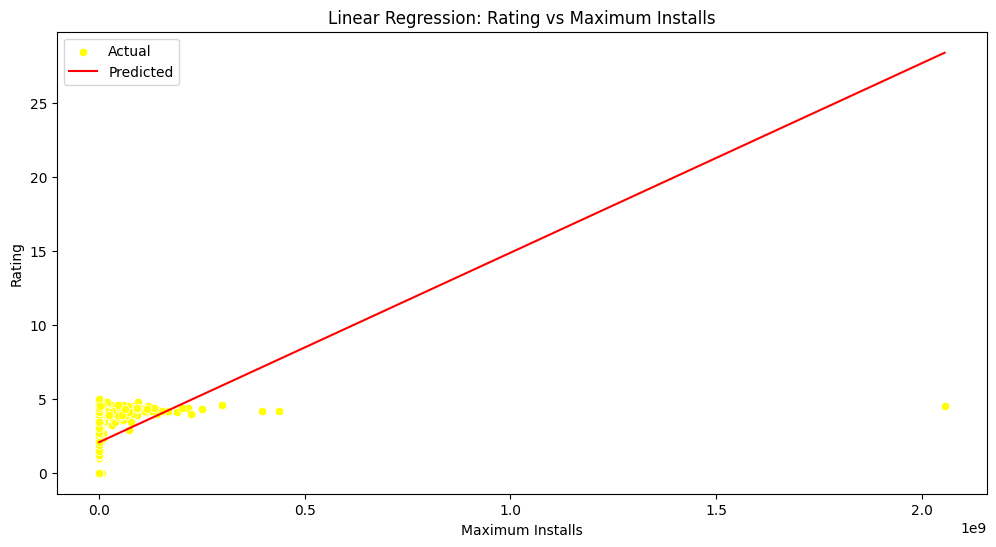

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x_test['Maximum Installs'], y=y_test, label='Actual', color='yellow')
sns.lineplot(x=x_test['Maximum Installs'], y=y_pred, label='Predicted', color='red')
plt.xlabel('Maximum Installs')
plt.ylabel('Rating')
plt.title('Linear Regression: Rating vs Maximum Installs')
plt.show()

In [9]:
print(model.intercept_)
print(model.coef_)

2.0693955535805664
[1.28185317e-08]


In [12]:
model.score(x_train, y_train)

0.0027665179439344545